## Importing libraries and Loading data set :

In [374]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


## EDA WITH TRAINING DATASET :

In [83]:
df = pd.read_csv(r"E:\Assignments\assignment_files\training_set.csv")
df1 = df.drop_duplicates()
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


## Handling missing values :

In [5]:
print("Missing values in training dataset:")
print(df1.isnull().sum())

Missing values in training dataset:
Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64


In [6]:
nullvalue_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                     'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                     'Loan_Amount_Term', 'Credit_History', 'property_Area']

for columns in nullvalue_columns:
    print(f"{df1[columns].value_counts()}\n")

Gender
Male      487
Female    112
Name: count, dtype: int64

Married
Yes    398
No     213
Name: count, dtype: int64

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Education
Graduate        479
Not Graduate    134
Name: count, dtype: int64

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

ApplicantIncome
2500.0    9
2600.0    6
6000.0    6
4583.0    5
3750.0    5
         ..
3975.0    1
3244.0    1
4408.0    1
3917.0    1
7583.0    1
Name: count, Length: 504, dtype: int64

CoapplicantIncome
0.0       273
2500.0      5
1666.0      5
2083.0      5
1459.0      3
         ... 
1010.0      1
1695.0      1
2598.0      1
1779.0      1
240.0       1
Name: count, Length: 286, dtype: int64

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      

In [68]:
# List of columns to fill missing values with mode
columns_to_fill = ['Gender', 'Married', 'Self_Employed', 'Education', 'Credit_History', 'property_Area', 'CoapplicantIncome',
                   'Dependents', 'Loan_Amount_Term']

df2 = df1.copy()

for col in columns_to_fill:
    mode_value = df1[col].mode()[0]  
    df2[col] = df2[col].fillna(mode_value)  


In [70]:
print("Missing values in new dataset:")
print(df2.isnull().sum())

Missing values in new dataset:
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       2
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
property_Area         0
Loan_Status           0
dtype: int64


In [72]:
# List of columns to fill missing values with mean
columns_to_fill = ['ApplicantIncome', 'LoanAmount']

df3 = df2.copy()

for col in columns_to_fill:
    mean_value = df2[col].mean() 
    df3[col] = df3[col].fillna(mean_value)  
 

In [74]:
print("Missing values in new dataset:")
print(df3.isnull().sum())

Missing values in new dataset:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64


### All missing values are filled !! 

## Data Visualization :

#### Bar graph showing relation between categorial features and Loan Status : 

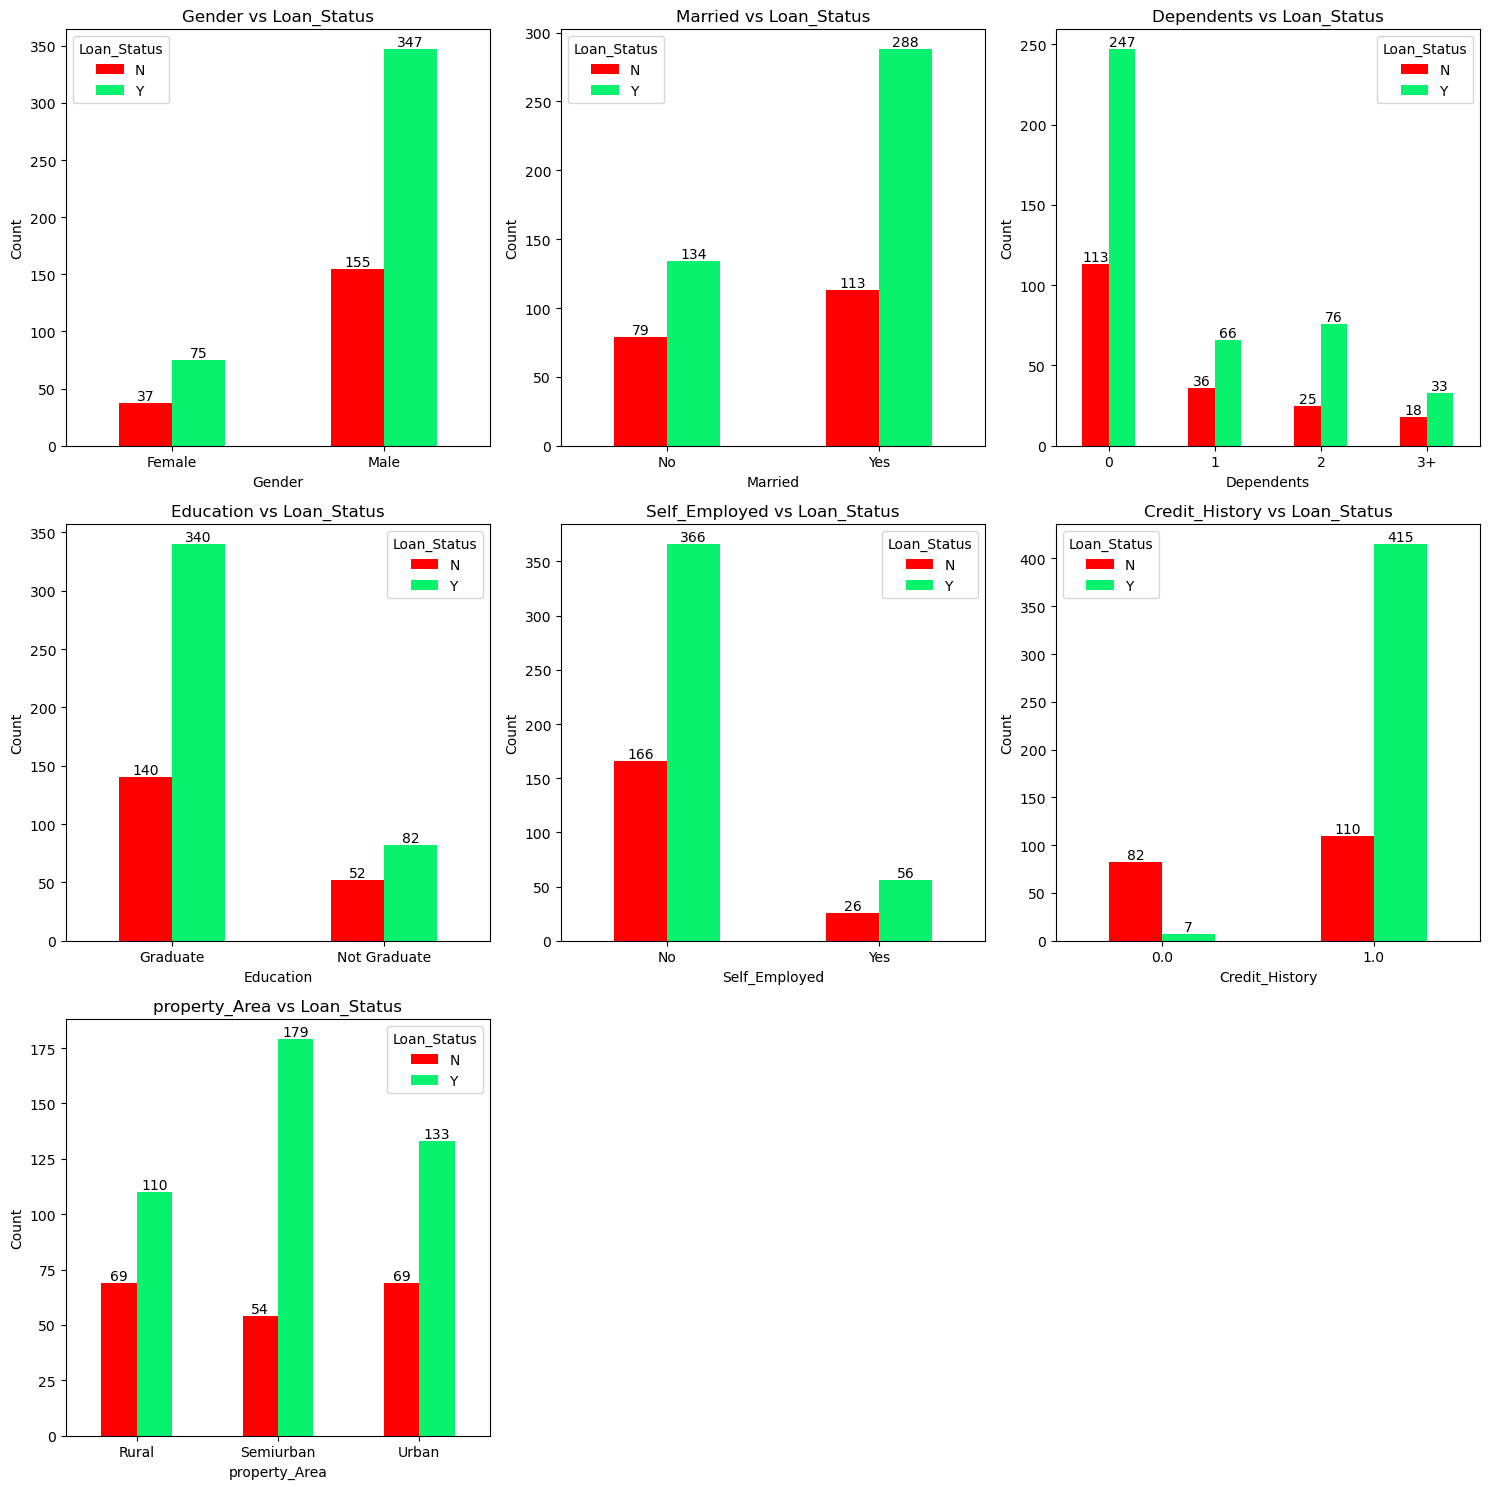

In [213]:
# List of categorical columns

columns = ['Gender', 'Married', 'Dependents', 'Education', 
           'Self_Employed', 'Credit_History', 'property_Area']

plt.figure(figsize=(15, 15))

for i, col in enumerate(columns):
    plt.subplot(3, 3, i + 1)
    
    ax = df3.groupby([col, 'Loan_Status']).size().unstack().plot(
        kind='bar', 
        stacked=False, 
        ax=plt.gca(), 
        color=['#ff0000', '#08f26e'] # Red for NO, Green for YES 
    )
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)
        
    plt.title(f'{col} vs Loan_Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
plt.tight_layout()
plt.show()

#### Box and whisker plots for numerical features : 

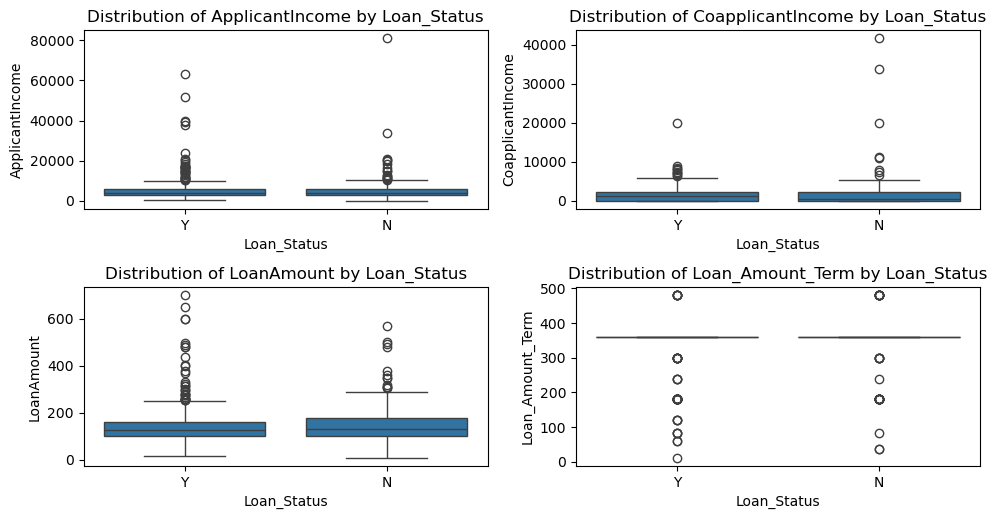

In [225]:
# List of numeric columns
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

plt.figure(figsize=(10, 10))

# Box Plots
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=df, x='Loan_Status', y=col)
    plt.title(f'Distribution of {col} by Loan_Status')
    plt.xlabel('Loan_Status')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

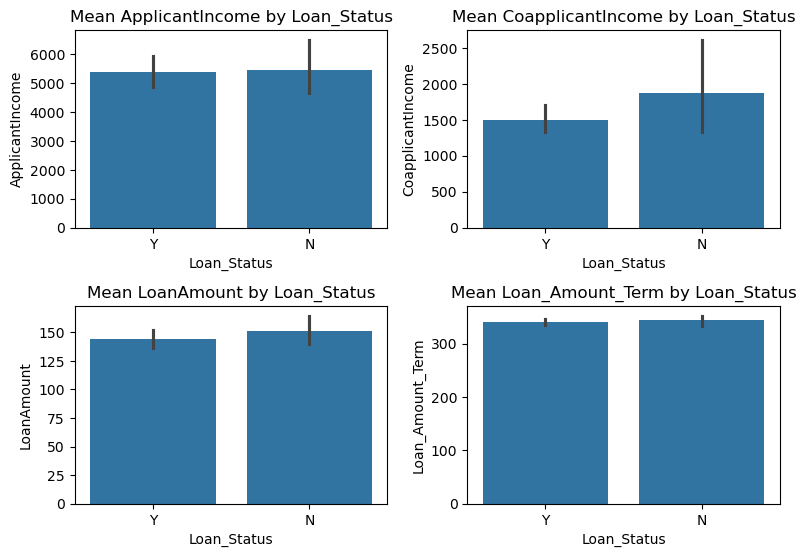

In [255]:
# Bar Plots (Mean values)

plt.figure(figsize=(8, 8))

for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i + 1)
    sns.barplot(data=df, x='Loan_Status', y=col)
    plt.title(f'Mean {col} by Loan_Status')
    plt.xlabel('Loan_Status')
    plt.ylabel(f'{col}', fontsize = 10 )

plt.tight_layout()
plt.show()

#### Feature Encoding :

In [277]:
df3.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
property_Area         object
Loan_Status           object
dtype: object

In [289]:
# Convert categorical columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

# Globally suppressing the deprecation warnings
pd.set_option('future.no_silent_downcasting', True)

df4 = df3.copy()

# Custom mapping for categorical columns in df3
df4['Gender'] = df4['Gender'].replace({'Male': 1, 'Female': 0}).infer_objects(copy=False)
df4['Married'] = df4['Married'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
df4['Dependents'] = df4['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3}).infer_objects(copy=False)
df4['Education'] = df4['Education'].replace({'Graduate': 1, 'Not Graduate': 0}).infer_objects(copy=False)
df4['Self_Employed'] = df4['Self_Employed'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
df4['property_Area'] = df4['property_Area'].replace({'Urban': 2, 'Semiurban': 1, 'Rural': 0}).infer_objects(copy=False)
df4['Loan_Status'] = df4['Loan_Status'].replace({'Y': 1, 'N': 0}).infer_objects(copy=False)

df4

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849.00000,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,5405.54085,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000.00000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583.00000,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000.00000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900.00000,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106.00000,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072.00000,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583.00000,0.0,187.000000,360.0,1.0,2,1


In [299]:
df4['Loan_ID'] = df4['Loan_ID'].str.replace('LP', '', regex=True)

df4['Loan_ID'] = pd.to_numeric(df4['Loan_ID'], errors='coerce')

# Display the updated DataFrame
print(df4['Loan_ID'].head())

0    1002
1    1003
2    1005
3    1006
4    1008
Name: Loan_ID, dtype: int64


In [301]:
df4.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
property_Area          int64
Loan_Status            int64
dtype: object

#### All features are converted into numeric data !

### Correlation matrix and Heatmap :

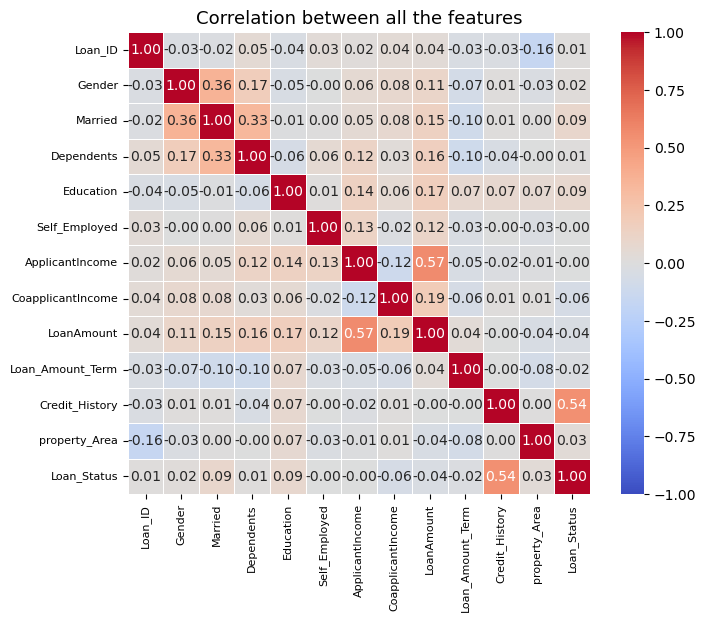

In [458]:
# Compute the correlation matrix
correlation_matrix = df4.corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True,           
            fmt='.2f',              
            cmap='coolwarm',       
            vmin=-1, vmax=1,      
            square=True,            
            linewidths=0.5)         
plt.title('Correlation between all the features', fontsize= 13)  
plt.xticks(fontsize=8)  
plt.yticks(fontsize=8)  
plt.show()


#### Key feature influencing loan eligibility is Credit History

## Data cleaning for test dataset :

In [342]:
test = pd.read_csv(r"E:\Assignments\assignment_files\testing_set.csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [348]:
test1 = test.drop_duplicates()
test1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [340]:
print("Missing values in test dataset:")
print(test.isnull().sum())

Missing values in test dataset:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
property_Area         0
dtype: int64


In [360]:
# List of columns to fill missing values with mode
columns_to_fill = ['Gender', 'Married', 'Self_Employed', 'Education', 'Credit_History', 'property_Area', 'CoapplicantIncome',
                   'Dependents', 'Loan_Amount_Term']

test2 = test1.copy()

for col in columns_to_fill:
    mode_value = test1[col].mode()[0]  
    test2[col] = test2[col].fillna(mode_value) 
    
# List of columns to fill missing values with mean
columns_to_fill = ['ApplicantIncome', 'LoanAmount']

test3 = test2.copy()

for col in columns_to_fill:
    mean_value = test2[col].mean() 
    test3[col] = test3[col].fillna(mean_value)
    
print("Missing values in test dataset:")
print(test3.isnull().sum())

Missing values in test dataset:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
dtype: int64


In [362]:
# Convert categorical columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

# Globally suppressing the deprecation warnings
pd.set_option('future.no_silent_downcasting', True)

test4 = test3.copy()

# Custom mapping for categorical columns in test3
test4['Gender'] = test4['Gender'].replace({'Male': 1, 'Female': 0}).infer_objects(copy=False)
test4['Married'] = test4['Married'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
test4['Dependents'] = test4['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3}).infer_objects(copy=False)
test4['Education'] = test4['Education'].replace({'Graduate': 1, 'Not Graduate': 0}).infer_objects(copy=False)
test4['Self_Employed'] = test4['Self_Employed'].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
test4['property_Area'] = test4['property_Area'].replace({'Urban': 2, 'Semiurban': 1, 'Rural': 0}).infer_objects(copy=False)

test4['Loan_ID'] = test4['Loan_ID'].str.replace('LP', '', regex=True)

test4['Loan_ID'] = pd.to_numeric(test4['Loan_ID'], errors='coerce')

# Display the updated DataFrame
print(test4['Loan_ID'].head())


0    1015
1    1022
2    1031
3    1035
4    1051
Name: Loan_ID, dtype: int64


In [364]:
test4.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
property_Area          int64
dtype: object

In [366]:
test4

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,1015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,1022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,1031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,1035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,1051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,2971,1,1,3,0,1,4009,1777,113.0,360.0,1.0,2
363,2975,1,1,0,1,0,4158,709,115.0,360.0,1.0,2
364,2980,1,0,0,1,0,3250,1993,126.0,360.0,1.0,1
365,2986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0


#### Test dataset is cleaned ! 

## Machine Learning :

In [544]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

### Decision Trees :

Accuracy: 0.73
Precision: 0.83
Recall: 0.78
F1-Score: 0.80
ROC-AUC: 0.70


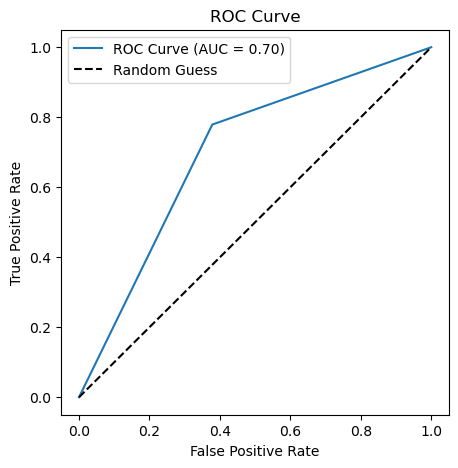

In [510]:
x = df4.drop(columns = ['Loan_Status'])
y = df4['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

model =  DecisionTreeClassifier()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, y_proba)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Decision Trees | Predict on Test Data :

In [508]:
# Predict the output (Loan_Status) for the test dataset
test5 = test4.copy()
test_predictions = model.predict(test5)

# Convert the numeric predictions back to original labels 
test5['Loan_Status'] = test_predictions
test5['Loan_Status'] = test5['Loan_Status'].replace({1: 'Y', 0: 'N'})

# Save the predictions to a CSV file
test5.to_csv('test_predictions.csv', index=False)

test5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,Y
1,1022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,Y
2,1031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,Y
3,1035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,N
4,1051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2971,1,1,3,0,1,4009,1777,113.0,360.0,1.0,2,Y
363,2975,1,1,0,1,0,4158,709,115.0,360.0,1.0,2,Y
364,2980,1,0,0,1,0,3250,1993,126.0,360.0,1.0,1,Y
365,2986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0,Y


### Random forest : 

Random Forest Classifier Evaluation:
Accuracy: 0.80
Precision: 0.78
Recall: 0.97
F1-Score: 0.87
ROC-AUC: 0.74


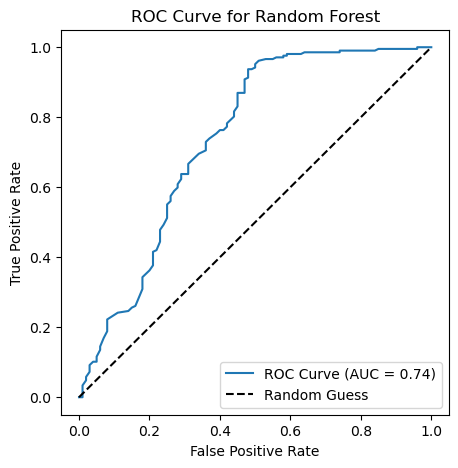

In [538]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

rf_model.fit(x_train, y_train)

rf_predictions = rf_model.predict(x_test)
rf_proba = rf_model.predict_proba(x_test)[:, 1]

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_proba)

print(f'Random Forest Classifier Evaluation:')
print(f'Accuracy: {rf_accuracy:.2f}')
print(f'Precision: {rf_precision:.2f}')
print(f'Recall: {rf_recall:.2f}')
print(f'F1-Score: {rf_f1:.2f}')
print(f'ROC-AUC: {rf_roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_proba)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()


In [609]:
from sklearn.ensemble import RandomForestClassifier

test_rf = test4.copy()

# Assuming 'random_forest_model' is the trained Random Forest model
test_predictions = rf_model.predict(test_rf)

# Convert the numeric predictions back to original labels 
test_rf['Loan_Status'] = test_predictions
test_rf['Loan_Status'] = test_rf['Loan_Status'].replace({1: 'Y', 0: 'N'})

# Save the predictions to a CSV file
test_rf.to_csv('test_predictions_rf.csv', index=False)

test_rf


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,Y
1,1022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,Y
2,1031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,Y
3,1035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,Y
4,1051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2971,1,1,3,0,1,4009,1777,113.0,360.0,1.0,2,Y
363,2975,1,1,0,1,0,4158,709,115.0,360.0,1.0,2,Y
364,2980,1,0,0,1,0,3250,1993,126.0,360.0,1.0,1,Y
365,2986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0,Y


### Logistic Regression :

Logistic Regression Evaluation:
Accuracy: 0.80
Precision: 0.78
Recall: 0.98
F1-Score: 0.87
ROC-AUC: 0.69


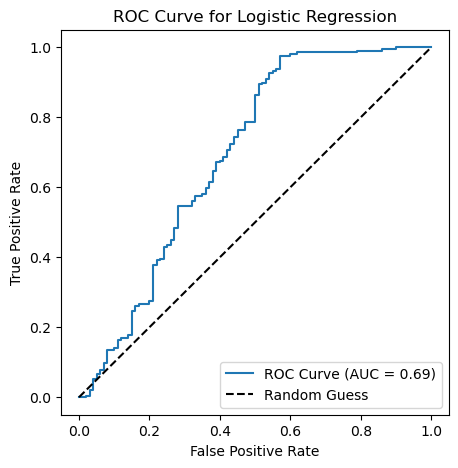

In [613]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

log_reg_model = LogisticRegression(random_state=42, solver='liblinear')  # Use 'liblinear' solver for binary classification

log_reg_model.fit(x_train, y_train)

log_reg_predictions = log_reg_model.predict(x_test)
log_reg_proba = log_reg_model.predict_proba(x_test)[:, 1]

# Calculate evaluation metrics
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
log_reg_precision = precision_score(y_test, log_reg_predictions)
log_reg_recall = recall_score(y_test, log_reg_predictions)
log_reg_f1 = f1_score(y_test, log_reg_predictions)
log_reg_roc_auc = roc_auc_score(y_test, log_reg_proba)

print(f'Logistic Regression Evaluation:')
print(f'Accuracy: {log_reg_accuracy:.2f}')
print(f'Precision: {log_reg_precision:.2f}')
print(f'Recall: {log_reg_recall:.2f}')
print(f'F1-Score: {log_reg_f1:.2f}')
print(f'ROC-AUC: {log_reg_roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_proba)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {log_reg_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()


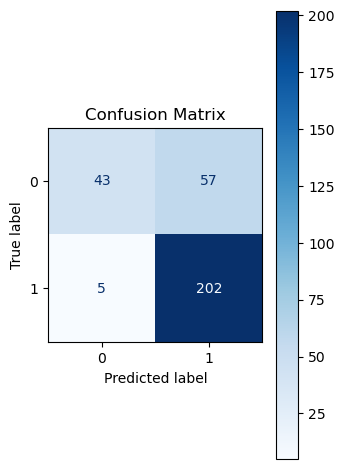

In [546]:
# Confusion Matrix
cm = confusion_matrix(y_test, log_reg_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_model.classes_)
plt.subplot(1, 2, 2)
disp.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

In [611]:
from sklearn.linear_model import LogisticRegression

test_logreg = test4.copy()

# Assuming 'log_reg_model' is the trained Logistic Regression model
test_predictions = log_reg_model.predict(test_logreg)

# Convert the numeric predictions back to original labels 
test_logreg['Loan_Status'] = test_predictions
test_logreg['Loan_Status'] = test_logreg['Loan_Status'].replace({1: 'Y', 0: 'N'})

# Save the predictions to a CSV file
test_logreg.to_csv('test_predictions_logreg.csv', index=False)

test_logreg


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,Y
1,1022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,Y
2,1031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,Y
3,1035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,Y
4,1051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2971,1,1,3,0,1,4009,1777,113.0,360.0,1.0,2,Y
363,2975,1,1,0,1,0,4158,709,115.0,360.0,1.0,2,Y
364,2980,1,0,0,1,0,3250,1993,126.0,360.0,1.0,1,Y
365,2986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0,Y


### Conclusion :

#### Random Forest Classifier demonstrates a slightly higher ROC-AUC score, indicating better performance in distinguishing between classes.So,Random Forest is the more suitable model.

## Recommendation for  Ineligible Customers:

In [623]:
from xgboost import XGBRegressor, XGBClassifier

Classification Model Evaluation (Training Data):
Accuracy: 0.97
Precision: 0.95
Recall: 1.00
F1-Score: 0.98
ROC-AUC: 1.00


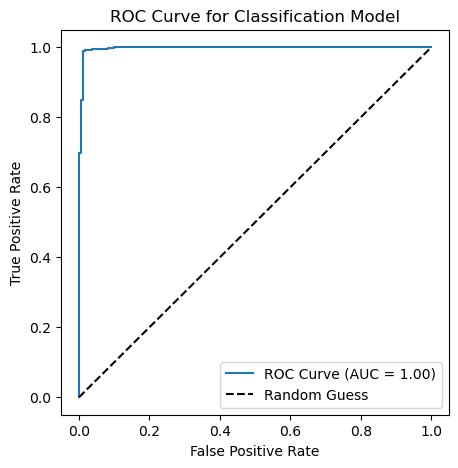

In [646]:

# Prepare data for classification
X_train_class = df4.drop(columns=['Loan_Status'])
y_train_class = df4['Loan_Status'].replace({'Y': 1, 'N': 0})


# Train the classification model
clf_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
clf_model.fit(X_train_class, y_train_class)


# Evaluate the classification model on training data
y_pred_class = clf_model.predict(X_train_class)
print("Classification Model Evaluation (Training Data):")
print(f"Accuracy: {accuracy_score(y_train_class, y_pred_class):.2f}")
print(f"Precision: {precision_score(y_train_class, y_pred_class):.2f}")
print(f"Recall: {recall_score(y_train_class, y_pred_class):.2f}")
print(f"F1-Score: {f1_score(y_train_class, y_pred_class):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_train_class, clf_model.predict_proba(X_train_class)[:, 1]):.2f}")

# Step 1: Predict probabilities for the positive class
y_proba_class = clf_model.predict_proba(X_train_class)[:, 1]

# Step 2: Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr_class, tpr_class, thresholds_class = roc_curve(y_train_class, y_proba_class)

# Step 3: Calculate ROC-AUC
roc_auc_class = roc_auc_score(y_train_class, y_proba_class)

# Step 4: Plot the ROC Curve
plt.figure(figsize=(5, 5))
plt.plot(fpr_class, tpr_class, label=f'ROC Curve (AUC = {roc_auc_class:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classification Model')
plt.legend()
plt.show()


In [675]:
# Make a copy of the test dataset
test_xgb = test4.copy()

# Assuming 'clf_model' is the trained XGBoost model
test_predictions_xgb = clf_model.predict(test_xgb)

# Convert the numeric predictions back to original labels
test_xgb['Loan_Status'] = test_predictions_xgb
test_xgb['Loan_Status'] = test_xgb['Loan_Status'].replace({1: 'Y', 0: 'N'})

# Save the predictions to a CSV file
test_xgb.to_csv('test_predictions_xgb.csv', index=False)

# Print the updated test dataset with predicted loan statuses
test_xgb 


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,Y
1,1022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,Y
2,1031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,Y
3,1035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,Y
4,1051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2971,1,1,3,0,1,4009,1777,113.0,360.0,1.0,2,Y
363,2975,1,1,0,1,0,4158,709,115.0,360.0,1.0,2,Y
364,2980,1,0,0,1,0,3250,1993,126.0,360.0,1.0,1,Y
365,2986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0,Y


In [677]:
# Count customers grouped by Loan_Status
loan_status_counts = test_xgb['Loan_Status'].value_counts()

print("Customer count grouped by Loan Status:")
print(loan_status_counts)

Customer count grouped by Loan Status:
Loan_Status
Y    288
N     79
Name: count, dtype: int64


## End of assignment

In [ ]:
## Next steps 

In [698]:
# Step 1: Filter ineligible customers
ineligible_customers = test_xgb[test_xgb['Loan_Status'] == 'N']

# Step 2: Prepare regression training data
X_train_reg = df4[df4['Loan_Status'] == 'N'].drop(columns=['Loan_Status', 'LoanAmount'])
y_train_reg = df4[df4['Loan_Status'] == 'N']['LoanAmount']

# Step 3: Train the regression model
reg_model = XGBRegressor(n_estimators=300, learning_rate=0.01, max_depth=4, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Step 4: Predict the maximum loan amount for ineligible customers
if not ineligible_customers.empty:
    X_test_reg = ineligible_customers.drop(columns=['Loan_Status', 'LoanAmount'])
    ineligible_customers = ineligible_customers.copy()  # Ensure we're working with a copy
    ineligible_customers.loc[:, 'Max_Loan_Amount'] = reg_model.predict(X_test_reg)

# Step 5: Save results
test_xgb.to_csv('test_result_xg1.csv', index=False)
if not ineligible_customers.empty:
    ineligible_customers.to_csv('ineligible_customers_with_max_loan1.csv', index=False)

# Step 6: Notify Completion
print("Regression model applied to ineligible customers.")
print("Results saved to 'test_result_xg1.csv' and 'ineligible_customers_with_max_loan1.csv'.")


Regression model applied to ineligible customers.
Results saved to 'test_result_xg1.csv' and 'ineligible_customers_with_max_loan1.csv'.


In [704]:
 ineligible_customers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,Max_Loan_Amount
7,1056,1,1,2,0,0,3881,0,147.0,360.0,0.0,0,N,0.0
13,1094,1,1,2,1,0,12173,0,166.0,360.0,0.0,1,N,0.0
16,1105,1,1,2,1,0,4583,2916,200.0,360.0,1.0,2,N,0.0
19,1115,1,0,0,1,0,1300,3470,100.0,180.0,1.0,1,N,0.0
25,1153,1,0,0,1,0,0,24000,148.0,360.0,0.0,0,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2858,0,0,0,1,0,4333,2333,162.0,360.0,0.0,0,N,0.0
342,2869,1,1,3,0,0,3522,0,81.0,180.0,1.0,0,N,0.0
343,2870,1,1,1,1,0,4700,0,80.0,360.0,1.0,2,N,0.0
346,2879,1,1,0,1,0,3391,1966,133.0,360.0,0.0,0,N,0.0


### Evaluation of model recommendation and classification :

In [700]:
# Step 1: Prepare the ineligible customers' data
if not ineligible_customers.empty:
    # Replace the 'LoanAmount' with the predicted 'Max_Loan_Amount'
    ineligible_customers_with_max = ineligible_customers.copy()
    ineligible_customers_with_max['LoanAmount'] = ineligible_customers_with_max['Max_Loan_Amount']

    # Drop unnecessary columns before classification
    X_test_max_loan = ineligible_customers_with_max.drop(columns=['Loan_Status', 'Max_Loan_Amount'])

    # Step 2: Predict Loan Eligibility
    predicted_eligibility = clf_model.predict(X_test_max_loan)

    # Step 3: Add the prediction results
    ineligible_customers_with_max['New_Loan_Status'] = predicted_eligibility
    ineligible_customers_with_max['New_Loan_Status'] = ineligible_customers_with_max['New_Loan_Status'].replace({1: 'Y', 0: 'N'})

    # Step 4: Separate customers who became eligible
    newly_eligible_customers = ineligible_customers_with_max[ineligible_customers_with_max['New_Loan_Status'] == 'Y']

    # Step 5: Save results
    ineligible_customers_with_max.to_csv('ineligible_customers_with_max_loan_status.csv', index=False)
    newly_eligible_customers.to_csv('newly_eligible_customers.csv', index=False)

    # Step 6: Notify Completion
    print(f"{len(newly_eligible_customers)} customers became eligible with the maximum loan amount.")
    print("Results saved to 'ineligible_customers_with_max_loan_status.csv' and 'newly_eligible_customers.csv'.")
else:
    print("No ineligible customers to process.")


13 customers became eligible with the maximum loan amount.
Results saved to 'ineligible_customers_with_max_loan_status.csv' and 'newly_eligible_customers.csv'.
